# Exploratory Data Analysis on Automobile data set.

Dataset Link - https://www.kaggle.com/toramky/automobile-dataset

1. 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2. Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3. Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

This data set consists of three types of entities:
(a) the specification of an auto in terms of various characteristics
(b) its assigned insurance risk rating
(c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

In [65]:
# Importing all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Loading the dataset
data=pd.read_csv('Automobile_data.csv')

In [67]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [68]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [69]:
# Lets check the dimension of the data set
data.shape

(205, 26)

In [70]:
# Printing the first 5 records of the data set
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [71]:
data.isnull().any()

,0
symboling,False
normalized-losses,False
make,False
fuel-type,False
aspiration,False
num-of-doors,False
body-style,False
drive-wheels,False
engine-location,False
wheel-base,False


In [72]:
data.isna().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [73]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [74]:
data.describe(include='object')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


From the above snapshot of the data, we can see that some columns have missing values '?'.
There are no empty value but we have to investigate for missing values


# Missing Value Detection and Treatment

In [75]:
# Lets start by checking the count of records in each column of the data set.
# If the count of records is lesser than the total number of records i.e. 768, we can conclude that there
# are blank records.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

There are no blank records. The missing records are represented by a '?'.

In [76]:
# Since some of the predictor columns are continuous in nature, there might be a chance that 0's
#in these columns indicate missing data.

# Lets check the above claim.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


None of the coninuous columns seem to have missing values represented by 0's.
We can also see that there are a total of 11 continuous variables, but the describe table has only 10 continuous variables.
This is because column "normalized losses" has missing values.

In [77]:
data.shape


(205, 26)

In [78]:
# Find columns with '?' values
question_mark_cols = [col for col in data.columns if data[col].astype(str).str.contains('\?').any()]

# Create a new DataFrame containing only the columns with '?' values
data_question_marks = data[question_mark_cols]

# Find all rows where any of the selected columns has a '?' value
rows_with_question_marks = data_question_marks[data_question_marks.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]

rows_with_question_marks

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price
0,?,two,3.47,2.68,111,5000,13495
1,?,two,3.47,2.68,111,5000,16500
2,?,two,2.68,3.47,154,5000,16500
5,?,two,3.19,3.4,110,5500,15250
7,?,four,3.19,3.4,110,5500,18920
9,?,two,3.13,3.4,160,5500,?
14,?,four,3.31,3.19,121,4250,24565
15,?,four,3.62,3.39,182,5400,30760
16,?,two,3.62,3.39,182,5400,41315
17,?,four,3.62,3.39,182,5400,36880


In [79]:
# prompt: replace all ? with the median of its column

# Iterate over each column with '?' values
for col in question_mark_cols:
    # Extract numeric values, handling errors
    numeric_values = pd.to_numeric(data[col], errors='coerce')

    # Calculate the median of the numeric values, excluding NaN
    median_value = numeric_values.median()

    # Replace '?' with the median value
    data[col] = data[col].replace('?', median_value)

In [80]:
# Lets check if the '?' have been replaced with median or not
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [81]:
print(data.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


Normalized-losses has 41 missing data points.
We will replace these missing values with the median of 'Normalized - losses' because median is least affected by outliers.

In [82]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
symboling,205.0,NaN,NaN,NaN,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
normalized-losses,205.0,52.0,115.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
make,205,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel-type,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num-of-doors,203,2,four,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body-style,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive-wheels,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine-location,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheel-base,205.0,NaN,NaN,NaN,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9


In [89]:
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'], downcast='float')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float32
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Also, notice that the data type of NormalizedLosses is object, we have to change its data type to numeric (float)

In [91]:
 data['normalized-losses']=data['normalized-losses'].astype('float64')

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Now that we have treated the missing values lets move to outlier detection and treatment.

# Outlier Detection and treatment

Outlier Detection

Boxplots are a great way of detecting outliers.
Once the outliers have been detected, they can be imputed with the 5th and 95th percentiles.

In [ ]:
data.columns

<Axes: ylabel='compression-ratio'>

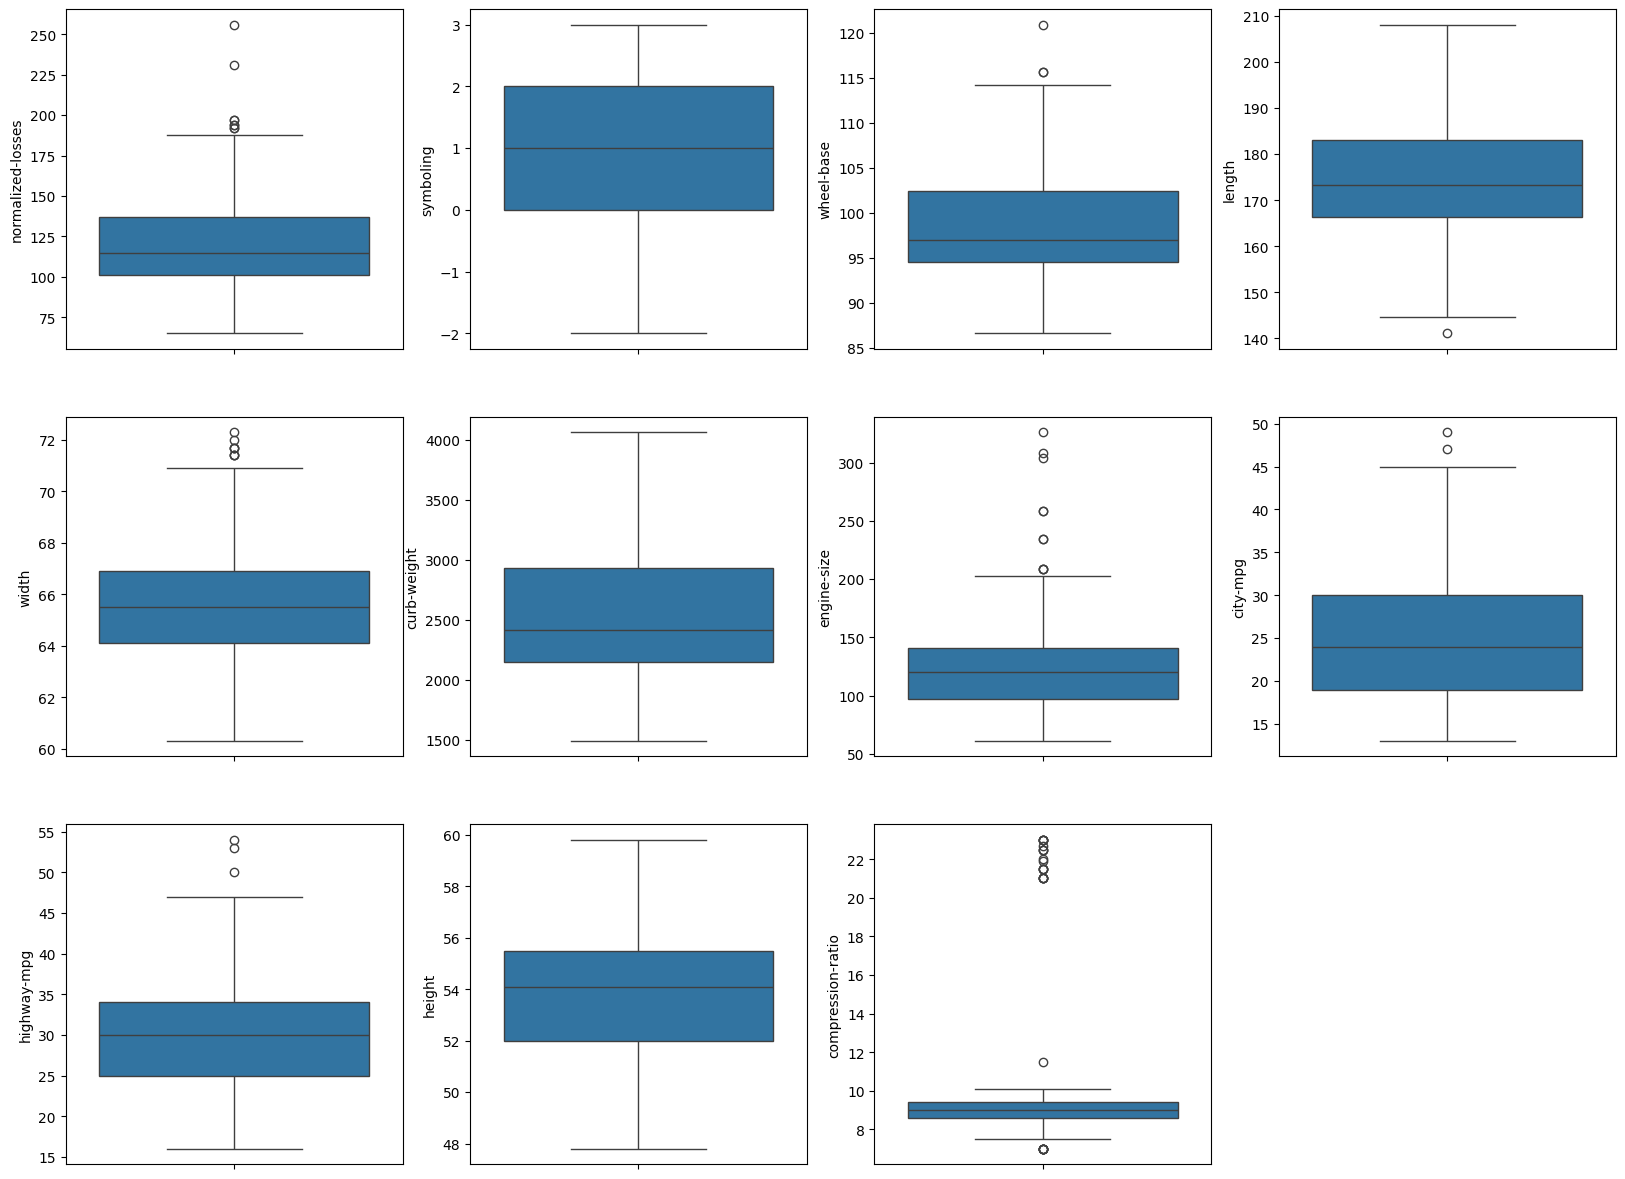

In [28]:
# Outlier detection using boxplots
plt.figure(figsize= (20,15))

plt.subplot(3,4,1)
sns.boxplot(data['normalized-losses'])

plt.subplot(3,4,2)
sns.boxplot(data['symboling'])

plt.subplot(3,4,3)
sns.boxplot(data['wheel-base'])

plt.subplot(3,4,4)
sns.boxplot(data['length'])

plt.subplot(3,4,5)
sns.boxplot(data['width'])

plt.subplot(3,4,6)
sns.boxplot(data['curb-weight'])

plt.subplot(3,4,7)
sns.boxplot(data['engine-size'])

plt.subplot(3,4,8)
sns.boxplot(data['city-mpg'])

plt.subplot(3,4,9)
sns.boxplot(data['highway-mpg'])

plt.subplot(3,4,10)
sns.boxplot(data['height'])

plt.subplot(3,4,11)
sns.boxplot(data['compression-ratio'])


From the above boxplots we can infer that out 11 continuous variables 8 of them have outliers. These outliers will be imputed with the 5th and 95th percentiles.

In [93]:
data['normalized-losses']=data['normalized-losses'].clip(lower=data['normalized-losses'].quantile(0.05), upper=data['normalized-losses'].quantile(0.95))

In [94]:

data['wheel-base']=data['wheel-base'].clip(lower=data['wheel-base'].quantile(0.05), upper=data['wheel-base'].quantile(0.95))
data['length']=data['length'].clip(lower=data['length'].quantile(0.05), upper=data['length'].quantile(0.95))
data['width']=data['width'].clip(lower=data['width'].quantile(0.05), upper=data['width'].quantile(0.95))
data['engine-size']=data['engine-size'].clip(lower=data['engine-size'].quantile(0.05), upper=data['engine-size'].quantile(0.95))
data['city-mpg']=data['city-mpg'].clip(lower=data['city-mpg'].quantile(0.05), upper=data['city-mpg'].quantile(0.95))
data['highway-mpg']=data['highway-mpg'].clip(lower=data['highway-mpg'].quantile(0.05), upper=data['highway-mpg'].quantile(0.95))
data['compression-ratio']=data['compression-ratio'].clip(lower=data['compression-ratio'].quantile(0.05), upper=data['compression-ratio'].quantile(0.89))

<Axes: ylabel='compression-ratio'>

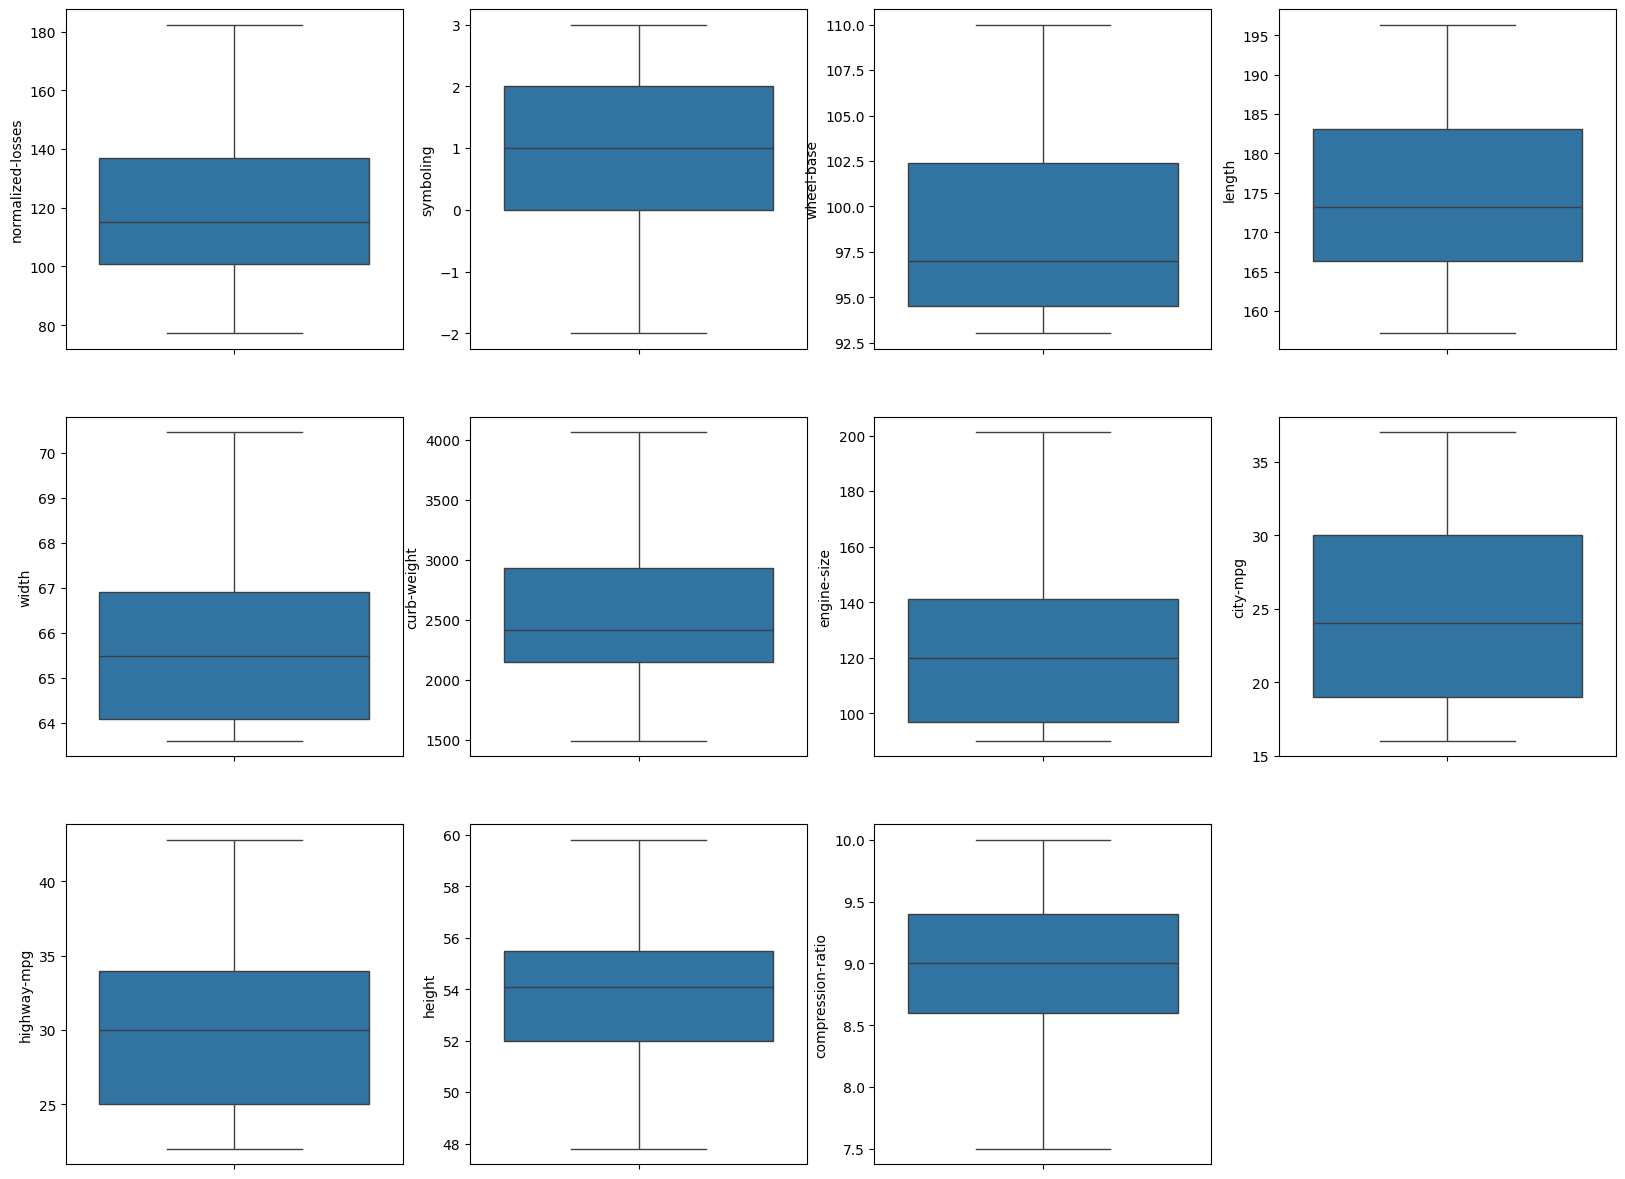

In [95]:
plt.figure(figsize= (20,15))
plt.subplot(3,4,1)
sns.boxplot(data['normalized-losses'])

plt.subplot(3,4,2)
sns.boxplot(data['symboling'])

plt.subplot(3,4,3)
sns.boxplot(data['wheel-base'])

plt.subplot(3,4,4)
sns.boxplot(data['length'])

plt.subplot(3,4,5)
sns.boxplot(data['width'])

plt.subplot(3,4,6)
sns.boxplot(data['curb-weight'])

plt.subplot(3,4,7)
sns.boxplot(data['engine-size'])

plt.subplot(3,4,8)
sns.boxplot(data['city-mpg'])

plt.subplot(3,4,9)
sns.boxplot(data['highway-mpg'])

plt.subplot(3,4,10)
sns.boxplot(data['height'])

plt.subplot(3,4,11)
sns.boxplot(data['compression-ratio'])

# Data Vizualisation

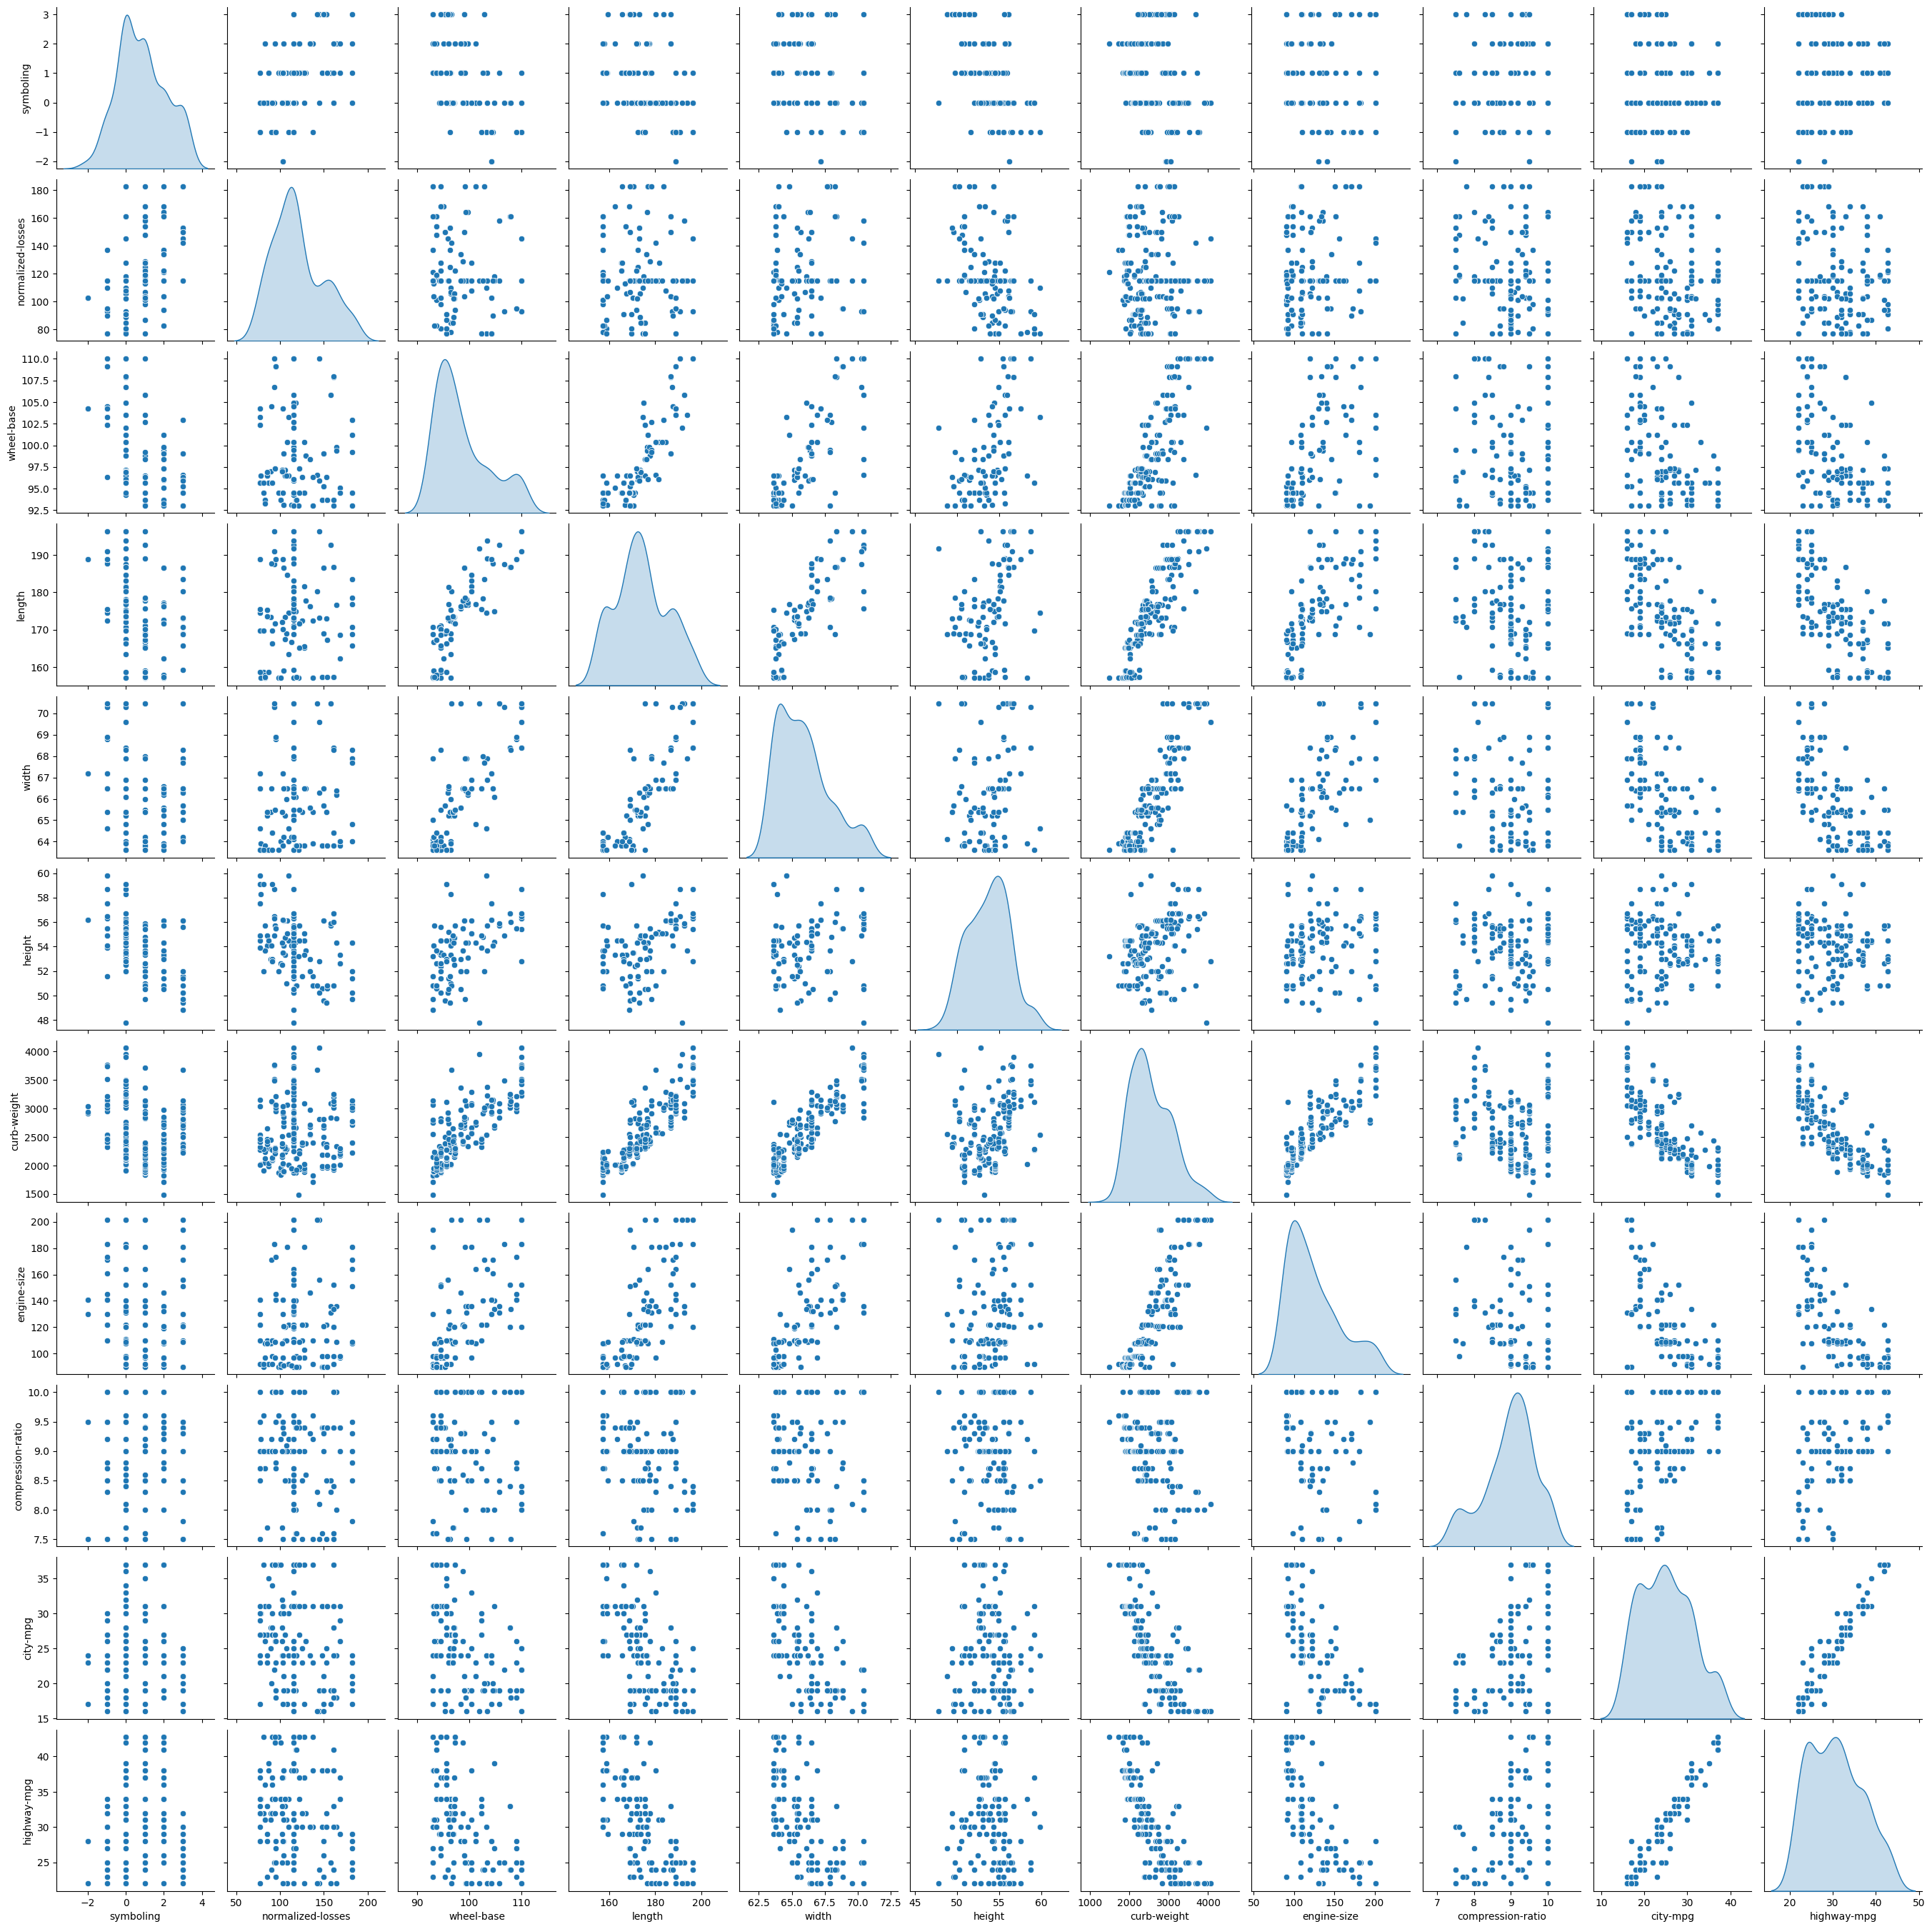

In [96]:
sns.pairplot(data, diag_kind='kde')

Some of the kernal density estimate plots show more than 1 peak, indicatig the preasence of clusters in the data set.


In [97]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [98]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,93.02,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27.0,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,93.02,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27.0,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19,26.0,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.80,...,109.0,mpfi,3.19,3.4,10.0,102,5500,24,30.0,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.40,...,136.0,mpfi,3.19,3.4,8.0,115,5500,18,22.0,17450


The above corrplot shows preasence of multi colinearity in the data set.

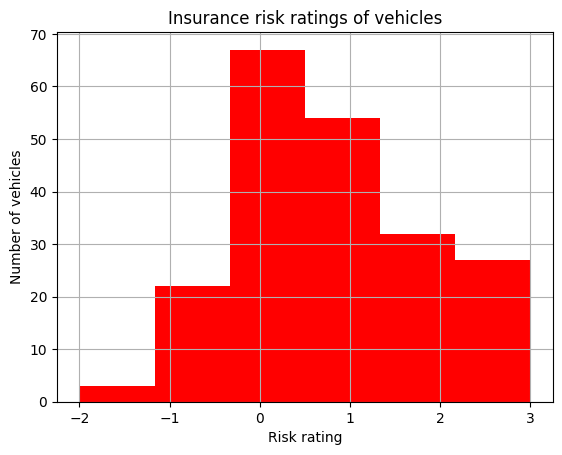

In [47]:
data.symboling.hist(bins=6,color='red');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

From the above histogram we can infer that a major part of the distribution lies between the range of 0.5 - 1.5.
We can also infer that a large number of cars in this data set are safe.

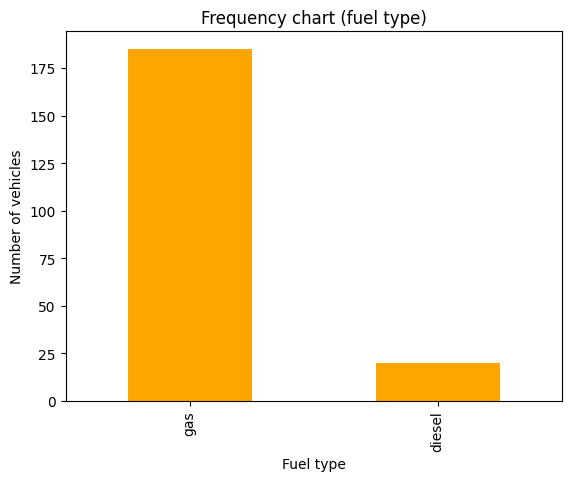

In [36]:
data['fuel-type'].value_counts().plot(kind='bar',color='orange')
plt.title("Frequency chart (fuel type)")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

From the above barchart we can infer that majority of the cars recorded in this datset run on gas

# Data Preprocessing

This dataset has 15 categorical variables and most of them have more than 2 categories.
We can not run a regression model on text data. So, in order to deal with this challenge lets learn about label encoding.
Label encoding is the preocess of converting categorical (text) data into numerical data.

Lets see how this is done.

In this example we will be working with the variable 'body-style' which has 5 categorie, namely -
1. convertible
2. Hatchback
3. Sedan
4. Wagon
5. hardtop

In [37]:
# data before lable encoding
data['body-style'].head(20)

,body-style
0,convertible
1,convertible
2,hatchback
3,sedan
4,sedan
5,sedan
6,sedan
7,wagon
8,sedan
9,hatchback


In [38]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
symboling,205.0,NaN,NaN,NaN,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
normalized-losses,205.0,NaN,NaN,NaN,119.959024,28.376086,77.2,101.0,115.0,137.0,182.4
make,205,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel-type,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num-of-doors,205,3,four,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body-style,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive-wheels,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine-location,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheel-base,205.0,NaN,NaN,NaN,98.724488,5.154445,93.02,94.5,97.0,102.4,110.0


bore have 4 ?s
stroke have 4 ?s
peakrpm have 2 ?s
pricr have 4 ?s

In [99]:
data.value_counts()

symboling  normalized-losses  make        fuel-type  aspiration  num-of-doors  body-style  drive-wheels  engine-location  wheel-base  length  width  height  curb-weight  engine-type  num-of-cylinders  engine-size  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  price
-2         103.0              volvo       gas        std         four          sedan       rwd           front            104.3       188.80  67.2   56.2    2912         ohc          four              141.0        mpfi         3.78  3.15    9.5                114         5400      23        28.0         12940    1
 1         168.0              toyota      gas        std         two           hatchback   rwd           front            94.5        168.70  64.0   52.6    2204         ohc          four              98.0         2bbl         3.19  3.03    9.0                70          4800      29        34.0         8238     1
           129.0              mazda       gas        std         two           hatchback   fwd           front            98.8        177.80  66.5   53.7    2385         ohc          four              122.0        2bbl         3.39  3.39    8.6                84          4800      26        32.0         8845     1
           148.0              dodge       gas        std         four          hatchback   fwd           front            93.7        157.30  63.8   50.6    1967         ohc          four              90.0         2bbl         2.97  3.23    9.4                68          5500      31        38.0         6229     1
                                                                               sedan       fwd           front            93.7        157.30  63.8   50.6    1989         ohc          four              90.0         2bbl         2.97  3.23    9.4                68          5500      31        38.0         6692     1
                                                                                                                                                                                                                                                                                                                         ..
 0         115.0              peugot      diesel     turbo       four          wagon       rwd           front            110.0       196.36  68.4   58.7    3430         l            four              152.0        idi          3.7   3.52    10.0               95          4150      25        25.0         13860    1
                                                                                                                                                             3485         l            four              152.0        idi          3.7   3.52    10.0               95          4150      25        25.0         17075    1
                                          gas        std         four          wagon       rwd           front            110.0       196.36  68.4   56.7    3285         l            four              120.0        mpfi         3.46  2.19    8.4                95          5000      19        24.0         16695    1
                                                                                                                                                     58.7    3230         l            four              120.0        mpfi         3.46  3.19    8.4                97          5000      19        24.0         12440    1
 3         182.4              volkswagen  gas        std         two           hatchback   fwd           front            94.5        165.70  64.0   51.4    2221         ohc          four              109.0        mpfi         3.19  3.4     8.5                90          5500      24        29.0         9980     1
Name: count, Length: 203, dtype: int64

In [100]:
data['bore'] = pd.to_numeric(data['bore'], downcast='float')
data['stroke'] = pd.to_numeric(data['stroke'], downcast='float')
data['horsepower'] = pd.to_numeric(data['horsepower'], downcast='float')
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'], downcast='float')
data['price'] = pd.to_numeric(data['price'], downcast='float')

In [101]:
# Label encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['make'] = labelencoder.fit_transform(data['make'])
data['fuel-type'] = labelencoder.fit_transform(data['fuel-type'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['num-of-doors'] = labelencoder.fit_transform(data['num-of-doors'])
data['body-style'] = labelencoder.fit_transform(data['body-style'])
data['drive-wheels'] = labelencoder.fit_transform(data['drive-wheels'])
data['engine-location'] = labelencoder.fit_transform(data['engine-location'])
data['engine-size'] = labelencoder.fit_transform(data['engine-size'])
data['engine-type'] = labelencoder.fit_transform(data['engine-type'])
data['num-of-cylinders'] = labelencoder.fit_transform(data['num-of-cylinders'])
data['fuel-system'] = labelencoder.fit_transform(data['fuel-system'])


In [102]:
# data after label encoding
data.head(20)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,1,0,2,0,93.02,...,14,5,3.47,2.68,9.0,111.0,5000.0,21,27.0,13495.0
1,3,115.0,0,1,0,1,0,2,0,93.02,...,14,5,3.47,2.68,9.0,111.0,5000.0,21,27.0,16500.0
2,1,115.0,0,1,0,1,2,2,0,94.50,...,24,5,2.68,3.47,9.0,154.0,5000.0,19,26.0,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.80,...,7,5,3.19,3.40,10.0,102.0,5500.0,24,30.0,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.40,...,18,5,3.19,3.40,8.0,115.0,5500.0,18,22.0,17450.0
5,2,115.0,1,1,0,1,3,1,0,99.80,...,18,5,3.19,3.40,8.5,110.0,5500.0,19,25.0,15250.0
6,1,158.0,1,1,0,0,3,1,0,105.80,...,18,5,3.19,3.40,8.5,110.0,5500.0,19,25.0,17710.0
7,1,115.0,1,1,0,0,4,1,0,105.80,...,18,5,3.19,3.40,8.5,110.0,5500.0,19,25.0,18920.0
8,1,158.0,1,1,1,0,3,1,0,105.80,...,15,5,3.13,3.40,8.3,140.0,5500.0,17,22.0,23875.0
9,0,115.0,1,1,1,1,2,0,0,99.50,...,15,5,3.13,3.40,7.5,160.0,5500.0,16,22.0,10295.0


After running the label encoding code, we can see that the variable body-style has numerical values ranging from 0-4.

The problem with lable encoding is that it introduces an order between the categories, i.e. 0>1>2>3>4.
This might confuse the model into thinkin that convertible is greater than hatchback.

So to deal with this problem, lets understand the concepts of one hot encoder.

In one hot encoding, categorical columns that have been label encoded are split into multiple colums and the values are replaced with 0's and 1's. 1's mark the preasence of a value and 0 its absence.

Lets look at an example -

In [103]:
# data before one hot encoding
data['body-style'].head(10)

,body-style
0,0
1,0
2,2
3,3
4,3
5,3
6,3
7,4
8,3
9,2


In [104]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data[['body-style']]).toarray())

In [105]:
# data after one hot encoding
enc_df

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
200,0.0,0.0,0.0,1.0,0.0
201,0.0,0.0,0.0,1.0,0.0
202,0.0,0.0,0.0,1.0,0.0
203,0.0,0.0,0.0,1.0,0.0


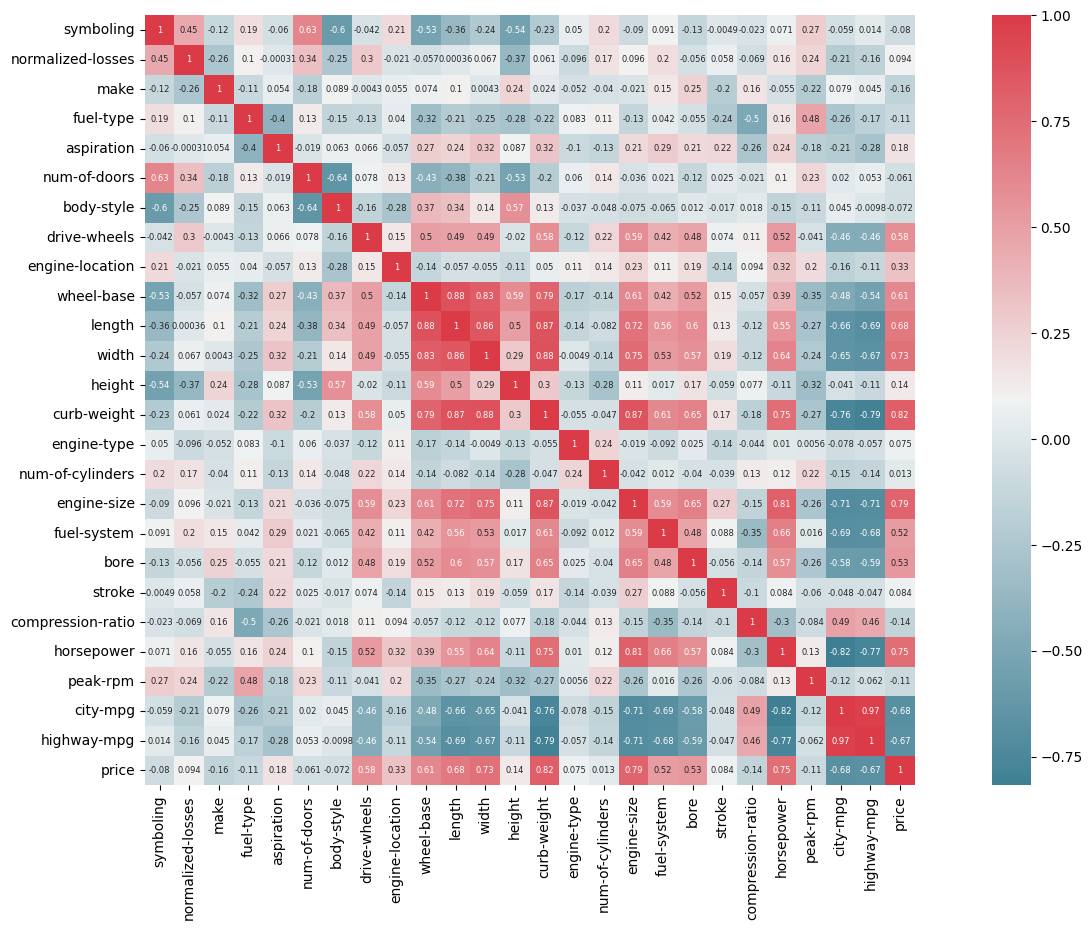

In [115]:
# prompt: f and ax = heatmap using sns and corr('pearson'), annot = True, square=True, and make annot_size = 6,

f, ax = plt.subplots(figsize=(20,10))
corr_matrix = data.corr(method='pearson')
sns.heatmap(corr_matrix,
            mask=np.zeros_like(corr_matrix, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True,
            square=True,
            ax = ax,
            annot_kws={"size": 6})
plt.show()